# Overview
In this notebook you will will learn how to use neural networks to:

- classify patients by gender
- classify images

Classifying patients based on their BMI, age, and blood pressure into binary gender classes will be similar to the  Tensorflow Playground exercise.  However, as you'll see from the scatter plot, these classes are not seperable based on these features.  So don't expect perfect accuracy.  After all, machines can't do any better than doctors.  No human doctor or nurse could perfectly predict someone's gender solely based on their BMI, age, and blood pressure.  

After classifying patients by gender based on the diabetes dataset that you are familiar with we'll move to a new kind of dataset, images. 
You will encounter images in the radiology department of you healthcare system.  
And iamgery is being used extensively for telemedicine, especially in remote regions of the world, or for specialties like dermatology where images often contain sufficient information for accurate diagnoses.




In the first cell below you will set up an empty hyper parameter table where you can store your model performance and the hyper parameters you used to achieve that performance.
Hyper-parameters are all the numbers and descriptions that someone else (or your future self) would need to reproduce your results.
Here are some examples of hyperparameters:

- Model type or class name, e.g.: `'LinearRegression'`
- Name & configuration for any scikitlearn `Scaler` you used, e.g.: `'MinMaxScaler'`
- The name(s) of the features you included or ignored, e.g.: `'AGE,SEX,BP,BMI'`
- The name(s) of the target variable, e.g. `'SEVERITY'`

The performance scores you'll want to store in this table include:

- Training set accuracy or error, e.g RMSE: `rmse_train=0.33`
- Test set accuracy or error, e.g. RMSE: `rmse_test=0.42` 

In [ ]:
# results = []  # use this to delete your previous results, if you like
try:
    assert len(results) > 0
    display(df_results.round(3))
except:
    results = []
    display(results)

[]

Setting a random seed is even more important for deep learning models. If you're curious search for "Lottery Ticket Hypothesis" on http://scholar.google.com/ . Also, setting a random seed ensures that any random number generator will run the same way for anyone else that sets that same random seed. Others will get the exact same results that you did.


In [ ]:
import pandas as pd
import numpy as np

hyperparams = dict(test_size=.2, seed=0)
try:
    s = pd.Series(hyperparams)
except:
    hyperparams = dict(test_size=.2, seed=0)

display('These are your hyperparameters:')    
display(pd.Series(hyperparams))

np.random.seed(hyperparams['seed'])
display(np.random.rand(2))

test_size    0.2
seed         0.0
dtype: float64

array([0.5488135 , 0.71518937])

In [ ]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

sns.set()  # seaborn settings that make prettier plots
pd.options.display.max_columns = 500
pd.options.display.max_rows = 40
pd.options.display.max_colwidth = 100
pd.options.display.min_rows = 10

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
DATA_DIR = ""
DATA_URL = "https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt"
df = pd.read_csv(DATA_URL, sep='\t')
df.head()

AGE  SEX   BMI     BP   S1     S2    S3   S4      S5  S6    Y
0   59    2  32.1  101.0  157   93.2  38.0  4.0  4.8598  87  151
1   48    1  21.6   87.0  183  103.2  70.0  3.0  3.8918  69   75
2   72    2  30.5   93.0  156   93.6  41.0  4.0  4.6728  85  141
3   24    1  25.3   84.0  198  131.4  40.0  5.0  4.8903  89  206
4   50    1  23.0  101.0  192  125.4  52.0  4.0  4.2905  80  135

The `diabetes.tab.txt` file is a tab-delimitted text file with the original unnormalized units (age in years, blood pressure in mmHg, gender as 1 for female, 2 for male.
The `diabetes.rwrite1.txt` url will load a dataset with standardized values for each feature, but more informative column names. In both data sets, here is what the names mean.
0. age: in years  
1. sex: 1=male, 2=female  
2. bmi: body mass index >35=obese, >30=overweight, <18.5=underweight  
3. bp/map: mean arterial pressure (blood pressure, systolic+diastolic divided by 2)  
4. s1/tc: TC level is a measure of a B12 transportation molecule that is not bound to B12 yet. I high ratio of holotranscobalamin (holo TC or TCH) to transcobalamin (TC) indicates healthy availability of B12 for absorption. TCH above 50 pmol/liter is considered good.  
5. s2/ldl: Low density lipid (good cholesterol)   
6. s3/hdl: High density Lipid cholesterol (bad cholesterol)  
7. s4/tch: holo TC level? (B12 bound tot he transport molecule, **t**rans**c**obalamin, to create **h**olo**t**rans**c**obalamin), <35pmol/L=B12deficiency, >50pmol/L=goodB12  
8. s5/ltg:  
9. s6/glu: glucose level  
10. y: a quantitative measure of disease progression one year after baseline  

In [ ]:
df_rewrite = pd.read_csv('https://www4.stat.ncsu.edu/~boos/var.select/diabetes.rwrite1.txt', sep=' ')
column_names = list(df_rewrite.columns)
df.columns = column_names
df.head().round(1)

age  sex   bmi    map   tc    ldl   hdl  tch  ltg  glu    y
0   59    2  32.1  101.0  157   93.2  38.0  4.0  4.9   87  151
1   48    1  21.6   87.0  183  103.2  70.0  3.0  3.9   69   75
2   72    2  30.5   93.0  156   93.6  41.0  4.0  4.7   85  141
3   24    1  25.3   84.0  198  131.4  40.0  5.0  4.9   89  206
4   50    1  23.0  101.0  192  125.4  52.0  4.0  4.3   80  135

Below you can see how to rename the tc column to `"bp"` for blood pressure.
You can rename the `"y"` column to `"severity"` to be explicit about what it means (diabetes severity score one year after the initial hospital visit).

In [ ]:
column_names[3] = 'bp'
column_names[-1] = 'severity'
df.columns = column_names
display(df.round(1))

age  sex   bmi     bp   tc    ldl   hdl  tch  ltg  glu  severity
0     59    2  32.1  101.0  157   93.2  38.0  4.0  4.9   87       151
1     48    1  21.6   87.0  183  103.2  70.0  3.0  3.9   69        75
2     72    2  30.5   93.0  156   93.6  41.0  4.0  4.7   85       141
3     24    1  25.3   84.0  198  131.4  40.0  5.0  4.9   89       206
4     50    1  23.0  101.0  192  125.4  52.0  4.0  4.3   80       135
..   ...  ...   ...    ...  ...    ...   ...  ...  ...  ...       ...
437   60    2  28.2  112.0  185  113.8  42.0  4.0  5.0   93       178
438   47    2  24.9   75.0  225  166.0  42.0  5.0  4.4  102       104
439   60    2  24.9   99.7  162  106.6  43.0  3.8  4.1   95       132
440   36    1  30.0   95.0  201  125.2  42.0  4.8  5.1   85       220
441   36    1  19.6   71.0  250  133.2  97.0  3.0  4.6   92        57

[442 rows x 11 columns]

You can select the columns you'd like to predict (the target variable) below.  
You can also see here how to create a `for` loop on a single line.  
A list comprehension is when you have a `for` loop between square brackets (`[]`).  
Square brackets are the python symbol used to define a `list`.  

In [ ]:
target_names = ['severity']
feature_names = ['age', 'sex', 'bmi']
# feature_names = [name for name in df.columns if name not in target_names]
print(f' target_names: {target_names}')
print(f'feature_names: {feature_names}')


 target_names: ['severity']
feature_names: ['age', 'sex', 'bmi']


One of the most useful visualizations for machine learning is a scatter plot or pair plot.  
It's especially useful when you plot the target variable on the vertical (y) axis and your feature variables on the horizontal axes.  

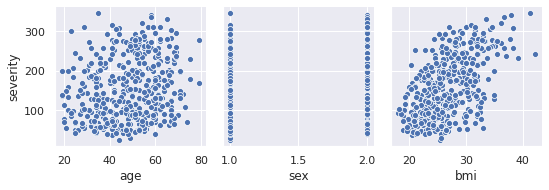

In [ ]:
fig = sns.pairplot(df, x_vars=feature_names[:4], y_vars=target_names)


In [ ]:
# fig = sns.pairplot(df, x_vars=feature_names[4:7], y_vars=target_names)

In [ ]:
# fig = sns.pairplot(df, x_vars=feature_names[7:], y_vars=target_names)

Create a training and testset.  
The training set is like the question and answer pairs you get to see during a school lesson.  
The test set is like the exam question and answer pairs that the teacher grades you on at the end of the course.  
Use the training set to show your machine learning model the relationship between your features (age, gender, bmi, blood tests etc) and your target variables (diabetes severity).  
You will use the training set to traiin or fit the model.  
You'll use the test set to see how well you model will work (it's accuracy, standard error, precision, recall, etc) in the real world.  
You'll make predictions for the test set "questions" (`X_test`) and see how closely they match the test set answers (`y_test`).

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[feature_names], df[target_names], test_size=hyperparams['test_size'])
X_train = pd.DataFrame(X_train, columns=feature_names)
X_test = pd.DataFrame(X_test, columns=feature_names)
y_train = pd.DataFrame(y_train, columns=target_names)
y_test = pd.DataFrame(y_test, columns=target_names)
print(f'X_train.shape: {X_train.shape}; y_train.shape: {y_train.shape}')
print(f' X_test.shape: {X_test.shape};  y_test.shape: {y_test.shape}')


X_train.shape: (353, 3); y_train.shape: (353, 1)
 X_test.shape: (89, 3);  y_test.shape: (89, 1)


The `DataFrame` method called `.describe()` is great for getting summary statistics about your training set.  
You can see here that our training set has 353 examples.  
Additional statistics for the range and mean (average) are also provided.  

In [ ]:
display(X_train.describe(include='all'))

age         sex         bmi
count  353.000000  353.000000  353.000000
mean    48.311615    1.467422   26.339660
std     13.280809    0.499646    4.434448
min     19.000000    1.000000   18.000000
25%     38.000000    1.000000   23.200000
50%     50.000000    1.000000   25.800000
75%     59.000000    2.000000   29.200000
max     79.000000    2.000000   42.200000

Do the same for the target variable in the training set:

In [ ]:
display(y_train.describe(include='all'))

severity
count  353.000000
mean   149.532578
std     77.005790
min     25.000000
25%     85.000000
50%    134.000000
75%    208.000000
max    346.000000

In this exercise you will learn how to tune an `SGDRegressor` (Stochastic Gradient Descent Linear Regression).  
An `SGDRegressor` is much faster for large datasets.  
It also has many more hyperparameters (settings) you can use to improve it's accuracy on difficult problems.  

In [ ]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor(loss='huber')
# model = SGDRegressor(alpha=0.01, loss='huber', learning_rate='optimal')
model

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='huber', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [ ]:
model_params = dict(model=model.__class__.__name__,
                    loss=model.loss,
                    alpha=model.alpha,
                    learning_rate=model.learning_rate,
                    epsilon=model.epsilon,
                    penalty=model.penalty
                    )
results.append(model_params)
display(results[-1])

{'alpha': 0.0001,
 'epsilon': 0.1,
 'learning_rate': 'invscaling',
 'loss': 'huber',
 'model': 'SGDRegressor',
 'penalty': 'l2'}

You can use the default hyperparameters within `SGDRegressor` for your first attempt to fit this dataset.

In [ ]:
model.fit(X_train, y_train.values[:,0])

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='huber', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [ ]:
model.n_iter_

111

In [ ]:
pd.Series(model.coef_, index=feature_names)

age   -0.199041
sex   -0.065023
bmi    5.727472
dtype: float64

In [ ]:
model.score(X_train, y_train)

0.26790847982436483

In [ ]:
model.score(X_test, y_test)

0.15012955484433044

You can compute predictions on the training and test set and compare them to the truth to see how well your model did.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


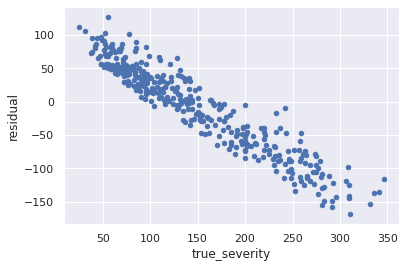

In [ ]:
y_train_pred = model.predict(X_train)
df_y_train = pd.DataFrame(y_train_pred, columns=['pred_severity'])
df_y_train['true_severity'] = y_train.values.flatten()
df_y_train['residual'] = y_train_pred - y_train.values.flatten()
df_y_train
df_y_train.plot(kind='scatter', x='true_severity', y='residual')

In [ ]:

y_test_pred = model.predict(X_test[feature_names])
rmse_test = np.sqrt(np.mean((y_test_pred - y_test.values) ** 2))
# rmse_train = np.sqrt(np.mean((y_train_pred - y_train.values) ** 2))
results[-1]['rmse_test'] = rmse_test
# results[-1]['rmse_train'] = ...
display(pd.DataFrame(results).round(2))


model   loss  alpha learning_rate  epsilon penalty  rmse_test
0  SGDRegressor  huber    0.0    invscaling      0.1      l2       83.0

In [ ]:
rmse_overfit_ratio = round((rmse_test - rmse_train) / rmse_test, 5)
rmse_overfit_ratio

0.0206